In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


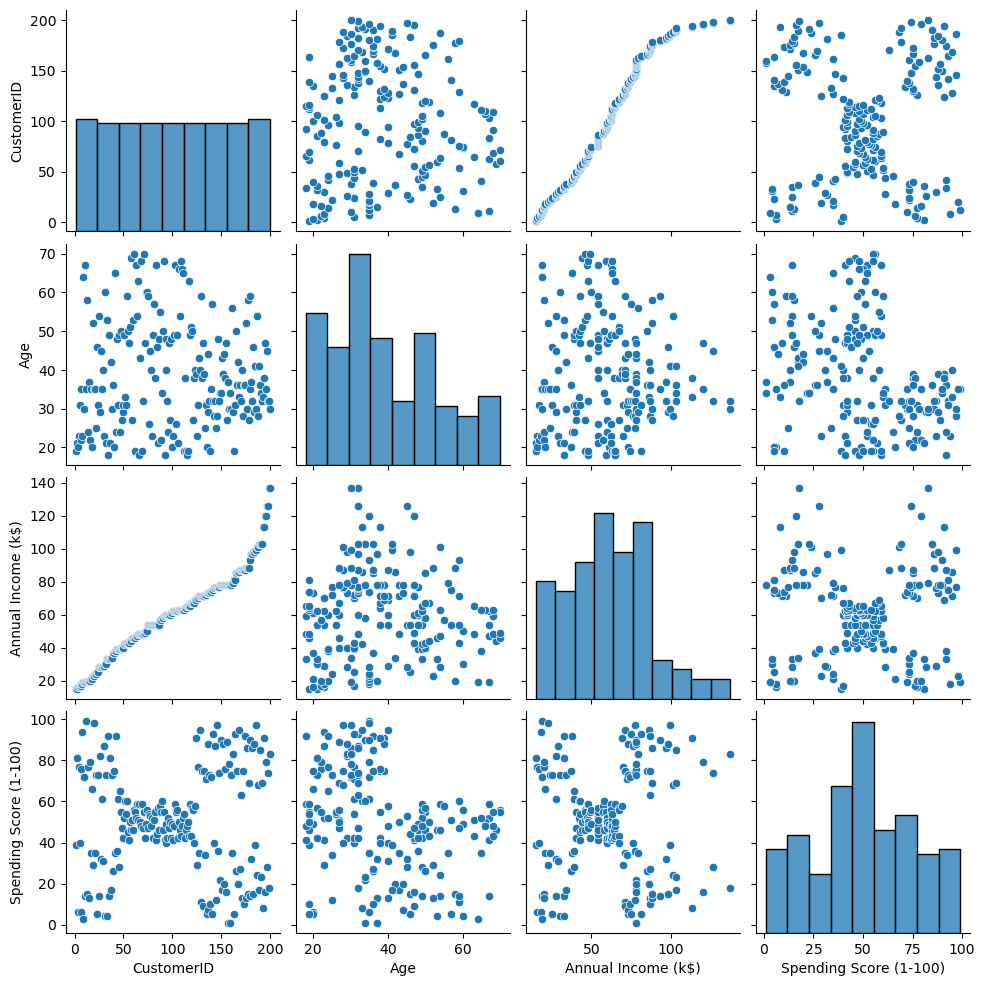

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
x=df.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [22]:
from scipy.cluster import hierarchy as hi
lk=hi.linkage(x,method="ward")
ddg=hi.dendrogram(lk)

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5)
ylabel=hc.fit_predict(x)

In [11]:
ylabel

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [12]:
df["hcy"]=ylabel

In [13]:
df["hcy"].value_counts()

2    85
1    39
0    32
4    23
3    21
Name: hcy, dtype: int64

In [14]:
df[df.hcy==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),hcy
count,32.000000,32.000000,32.000000,32.000000,32.0
mean,166.250000,41.000000,89.406250,15.593750,0.0
std,21.005376,11.036596,16.612975,8.936548,0.0
min,129.000000,19.000000,71.000000,1.000000,0.0
25%,150.500000,34.000000,78.000000,9.750000,0.0
50%,168.000000,41.500000,86.500000,15.000000,0.0
75%,183.500000,47.000000,98.250000,20.500000,0.0
max,199.000000,59.000000,137.000000,39.000000,0.0


In [15]:
df.groupby("hcy")[["Annual Income (k$)","Spending Score (1-100)"]].mean()

,Annual Income (k$),Spending Score (1-100)
hcy,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


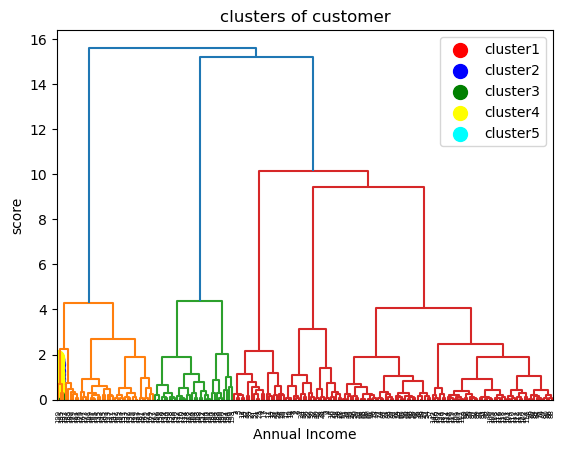

In [16]:
plt.scatter(x[ylabel==0,0],x[ylabel==0,1],s=100,c="red",label="cluster1")
plt.scatter(x[ylabel==1,0],x[ylabel==1,1],s=100,c="blue",label="cluster2")
plt.scatter(x[ylabel==2,0],x[ylabel==2,1],s=100,c="green",label="cluster3")
plt.scatter(x[ylabel==3,0],x[ylabel==3,1],s=100,c="yellow",label="cluster4")
plt.scatter(x[ylabel==4,0],x[ylabel==4,1],s=100,c="cyan",label="cluster5")


plt.xlabel("Annual Income")
plt.ylabel("score")
plt.title("clusters of customer")
plt.legend()
plt.show()

In [17]:
x=df.iloc[:,[3,4]]
y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=True)

In [19]:
def dataset(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n")
    
    print(classification_report(ytest, ypred))
    return model

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
dt=dataset(DecisionTreeClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.95

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      1.00      0.96        11
           2       1.00      0.95      0.98        22
           3       1.00      0.88      0.93         8
           4       0.90      1.00      0.95         9

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60

